In [30]:
import arff
import numpy as np
from scipy import sparse
decoder = arff.ArffDecoder()
d = decoder.decode(open('rcv1subset1-train.arff', 'r'), encode_nominal=True, return_type=arff.COO)
data = d['data'][0]
row = d['data'][1]
col = d['data'][2]
matrix = sparse.coo_matrix((data, (row, col)), shape=(max(row)+1, 47337)) # the COO format is also called the ijv format. 
d = decoder.decode(open('rcv1subset1-test.arff', 'r'), encode_nominal=True, return_type=arff.COO)
data = d['data'][0]
row = d['data'][1]
col = d['data'][2]
test_matrix = sparse.coo_matrix((data, (row, col)), shape=(max(row)+1, 47337)) # for the test set, the last column is blank, so we cannot simply infer size from maximum column index

In [65]:
np.array(data)[np.where(np.array(col)==47235)]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [66]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

use_svd = True

logit = LogisticRegression()
features=matrix.A[:,0:47236]
labels = matrix.A[:,47236:]
print(test_matrix.A[:,47235][np.nonzero(test_matrix.A[:,47235])])
features[np.nonzero(features)] = 1 # turn feature vector to binary
features = features.astype(np.int32)
labels = labels.astype(np.int32)
test_features=test_matrix.A[:,0:47236]
test_labels = test_matrix.A[:,47235:-1] # this is the problem. column 47235 is actually already labels for some reason 
test_features[np.nonzero(test_features)] = 1
test_features = test_features.astype(np.int32)
test_labels = test_labels.astype(np.int32)

if(use_svd):
    svd = TruncatedSVD(500)
    features = svd.fit_transform(features)
    test_features = svd.transform(test_features)
clf = MultiOutputRegressor(logit).fit(features, labels)
prediction = clf.predict(test_features)
#prediction = np.roll(prediction,-1,axis=1)
print(log_loss(test_labels,prediction))
print(f1_score(test_labels,prediction,average='micro'))
print(f1_score(test_labels,prediction,average='macro'))
print(accuracy_score(test_labels,prediction))
print(hamming_loss(test_labels,prediction))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
37.51560539795067
0.7089360551574961
0.29977172251443707
0.42033333333333334
0.01421122112211221


c:\users\david\anaconda3\envs\graphenv\lib\site-packages\sklearn\metrics\_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


[ 50  26  28  65  36  38  39  40  41  42  43  75  47  48  49  69  56  57
  68  61  62  63  25  24  77  66   8  82  12  13  81  80  16  17  84  85
  88  92  54  37  67  20  23  52  86  19  55  91   3  78  76  29  90  72
  74  34  32  64  27  58  31  30  53   1  79  51  18   0   6  11 100  10
  45  35  60  21  22  46  89  71   2  73  94   9  15  96  97  44  87  83
  14  99   7  93   5  95  98  59   4  70  33]
[100  48  79  68  41  49  76  40  24  56  38  87  42  65  80  39  47  27
  35  66  55  62  53  64  46  19  91  25  11  51   7  84  81  61  67  60
  28  12  22  83  23  15  74  37  85  18  57  36  90  77  33  89  63   2
  71  16  54  31  30  75  73  29  10  99   0   5  26  78  50   9  52  44
  59  17  45  34  88  20  70  72  93  95  96  21   8  86   1  43  14  82
  98  92  13   6  94   4  97  58   3  69  32]


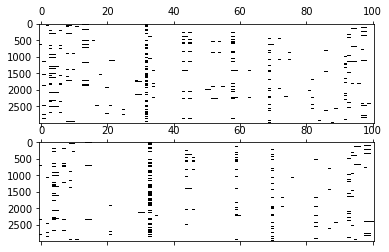

In [15]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.spy(test_labels,aspect='auto')
plt.subplot(212)
plt.spy(prediction,aspect='auto')
np.count_nonzero(test_labels)
print(np.argsort(np.sum(prediction,0)))
print(np.argsort(np.sum(test_labels,0)))

In [37]:
min(col)

1